<a href="https://colab.research.google.com/github/dwihdyn/algo-trading/blob/master/Processing_Data_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**From Oreilly : https://www.oreilly.com/library/view/hands-on-algorithmic-trading/9781492082637/**



Summary :
1.   Get Stock price from alphavantage API
2.   Rename data column
3.   Convert prices from string to float
4.   Convert the index to date
5.   Visualise data in time series
6.   Create & calculate SMA10 & SMA20
7.   Sort the data with the date, ascending order
8.   Recalculate SMA10 & SMA20 due to sort data
9.   Remove any NaN values in SMA10 & SMA20


***IMPORT MODULES***

In [0]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import requests
import json

***IMPORT MSFT DATA FROM ALPHAVANTAGE***

In [0]:
response = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=RKKWDNO3XD91IUBZ")
alphadict = json.loads(response.text)
alphadict.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [0]:
stock = pd.DataFrame(alphadict['Time Series (Daily)']).T
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2019-12-10 to 2019-07-22
Data columns (total 5 columns):
1. open      100 non-null object
2. high      100 non-null object
3. low       100 non-null object
4. close     100 non-null object
5. volume    100 non-null object
dtypes: object(5)
memory usage: 4.7+ KB


***RENAME THE (BAD) NAMING COLUMN ['1. open', ...] -> ['open', ...]***


In [0]:
stock.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [0]:
stock.columns = ['open', 'high', 'low', 'close', 'volume']
stock.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

***CONVERT PRICES FROM STRING TO FLOAT***

In [0]:
stock = stock.astype(float)
type(stock['close'][1])

numpy.float64

***CONVERT THE INDEX TO DATE***

In [0]:
# type(stock.index) # check that its index
stock.index = pd.to_datetime(stock.index)
type(stock.index) # now check that now is date

pandas.core.indexes.datetimes.DatetimeIndex


***SHOW 10 SAMPLE DATA BY RANDOM***


In [0]:
sample = stock.sample(10)
sample

,open,high,low,close,volume
2019-08-07,133.79,135.6500,131.8284,135.28,33414539.0
2019-09-23,139.23,139.6300,138.4400,139.14,17408374.0
2019-09-16,135.83,136.7000,135.6600,136.33,16731440.0
2019-10-30,143.52,145.0000,142.7900,144.61,18496591.0
2019-11-06,144.37,144.5200,143.2000,144.06,16575798.0
2019-07-31,140.33,140.4900,135.0800,136.27,38598786.0
2019-10-24,139.39,140.4200,138.6700,139.94,37278399.0
2019-12-04,150.14,150.1799,149.2000,149.85,17580617.0
2019-08-26,134.99,135.5600,133.9000,135.45,20325271.0
2019-09-10,136.80,136.8862,134.5100,136.08,28903378.0


***SUMMARISE DATA***

In [0]:
summary = stock.describe()
summary

,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,141.080747,141.925517,139.851811,140.976950,2.316608e+07
std,5.190243,5.081665,5.475383,5.343021,6.825999e+06
min,133.300000,133.929800,130.780000,132.210000,6.650398e+06
25%,137.234925,138.402500,136.267500,137.305000,1.802977e+07
50%,139.515000,140.270000,138.115000,139.120000,2.226569e+07
75%,144.377500,145.000000,143.572500,144.310000,2.618459e+07
max,152.330000,152.500000,151.520000,152.320000,4.274955e+07


***VISUALISE DATA***

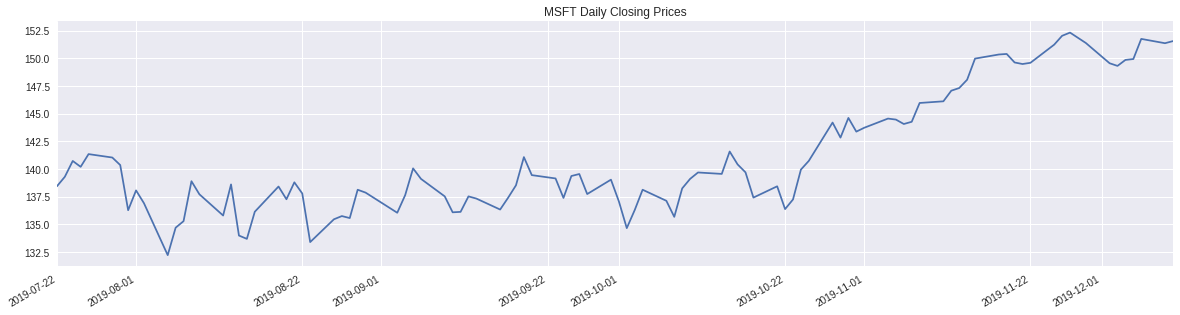

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd64f604b00>, None)

In [0]:
stock['close'].plot(figsize=(20,5), title='MSFT Daily Closing Prices'),plt.show()

***EXPLORING SIGNALS : SMA CROSSOVER***

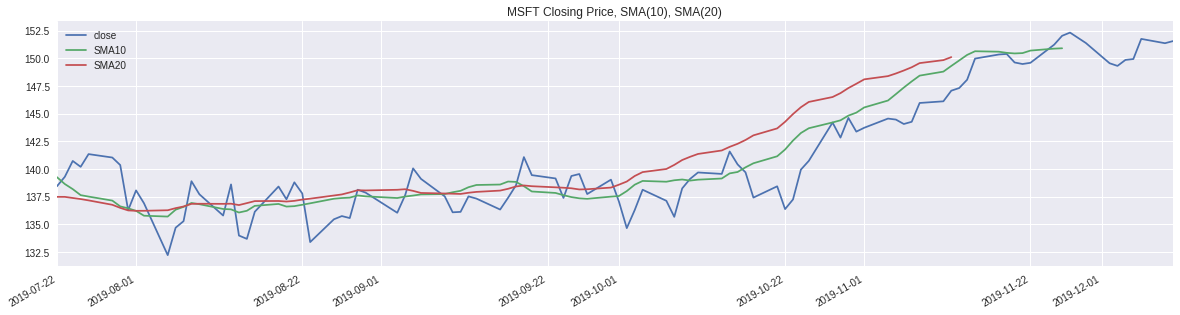

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd64ed92860>, None)

In [0]:
stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA10', 'SMA20']].plot(figsize=(20,5), grid=True, title='MSFT Closing Price, SMA(10), SMA(20)'),plt.show()
# stock # NaN because it takes mean of n period FORWARD, alphavantage issue on data importing

***SORT DATA BY DATE ASCENDING & PLOT RIGHT CHART***

In [0]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2019-12-10,151.29,151.8900,150.89,151.55,6650398.0,NaN,NaN
2019-12-09,151.07,152.2100,150.91,151.36,15282906.0,NaN,NaN
2019-12-06,150.99,151.8700,150.27,151.75,16410400.0,NaN,NaN
2019-12-05,150.05,150.3200,149.48,149.93,17880601.0,NaN,NaN
2019-12-04,150.14,150.1799,149.20,149.85,17580617.0,NaN,NaN


In [0]:
stock = stock.sort_index(ascending=True)
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2019-07-22,137.41,139.190,137.3300,138.43,25080760.0,139.258,137.4770
2019-07-23,139.76,139.990,138.0300,139.29,18034589.0,138.636,137.4760
2019-07-24,138.90,140.740,138.8500,140.72,20738275.0,138.176,137.3745
2019-07-25,140.43,140.610,139.3215,140.19,18356859.0,137.632,137.2780
2019-07-26,140.37,141.675,140.3000,141.34,19037600.0,137.502,137.1575


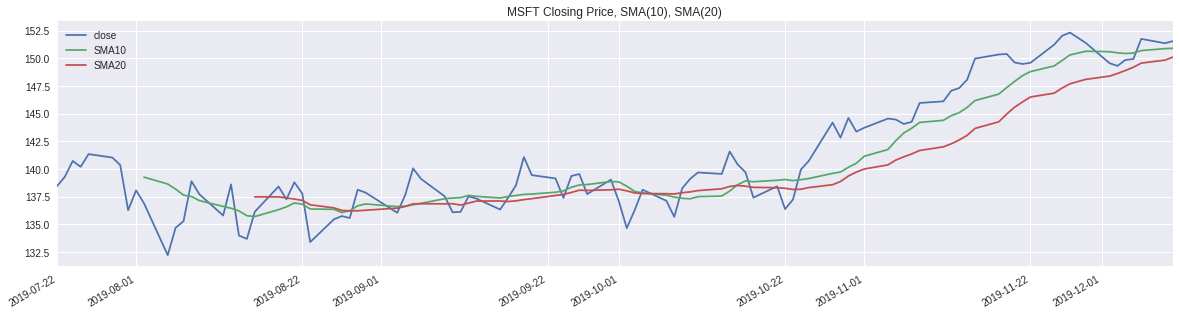

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd64ec7eb00>, None)

In [0]:
# Need to recalculate SMA

stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA10','SMA20']].plot(figsize=(20,5), grid=True, title='MSFT Closing Price, SMA(10), SMA(20)'),plt.show()

In [0]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2019-07-22,137.41,139.190,137.3300,138.43,25080760.0,NaN,NaN
2019-07-23,139.76,139.990,138.0300,139.29,18034589.0,NaN,NaN
2019-07-24,138.90,140.740,138.8500,140.72,20738275.0,NaN,NaN
2019-07-25,140.43,140.610,139.3215,140.19,18356859.0,NaN,NaN
2019-07-26,140.37,141.675,140.3000,141.34,19037600.0,NaN,NaN


***REMOVE NaN***

               open      high      low   close      volume    SMA10     SMA20
2019-08-16  134.880  136.4600  134.720  136.13  25026151.0  135.696  137.4770
2019-08-19  137.855  138.5500  136.885  138.41  24370543.0  136.316  137.4760
2019-08-20  138.210  138.7100  137.240  137.26  21188998.0  136.573  137.3745
2019-08-21  138.550  139.4935  138.000  138.79  14982314.0  136.924  137.2780
2019-08-22  138.660  139.2000  136.290  137.78  18709662.0  136.813  137.1575


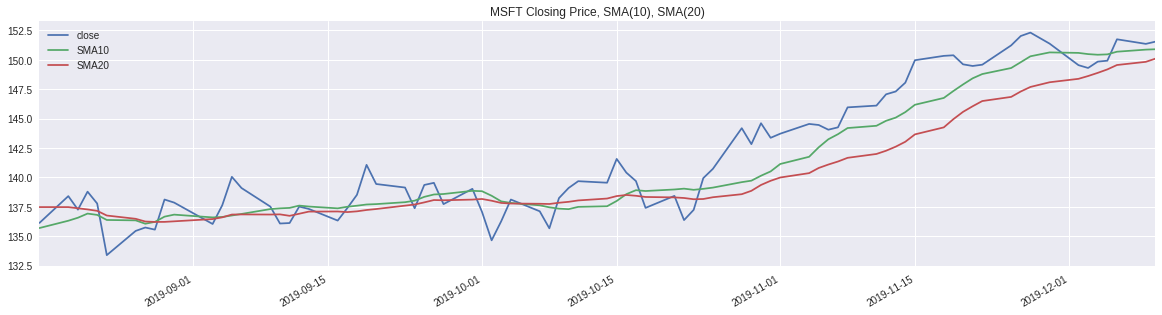

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd64ec7e7b8>, None)

In [0]:
stock.dropna(inplace=True)
print(stock.head())
stock[['close', 'SMA10','SMA20']].plot(figsize=(20,5), grid=True, title='MSFT Closing Price, SMA(10), SMA(20)'),plt.show()